In [2]:
import matplotlib.pyplot as plt
import numpy as np
#plt.switch_backend('Qt5Agg')


0
8
10
11
12
16
17
18
19
20
21
22
23


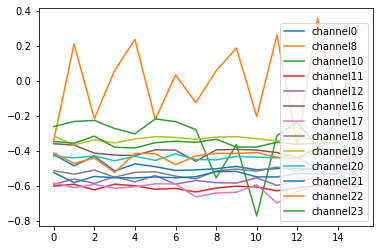

In [3]:

nbBlocks = 16
offsetsPy = np.loadtxt("offsets_from _python_event2_station11_run700.txt", delimiter=" ")
offsetsC = np.loadtxt("offsets_from _c_event2_station11_run700.txt", dtype='double', delimiter=" ")

channelPy = offsetsPy[:, 0]
channelC = offsetsC[:, 0]
blocks =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

#%% compare
fig, ax = plt.subplots()
for channel in range(len(channelPy)):
    for i in range(len(channelC)):
        if (channelC[i] == channelPy[channel]):
            print(channel)
            for block in range(1, len(offsetsPy[0, :])):    
                #print(block-1, (offsetsPy[channel][block]-offsetsC[channel][block]))
                #ax.plot(block-1, (offsetsPy[channel][block]-offsetsC[channel][block]), label = 'channel'+str(channel))
                #print(' ')
                tmp = 2
            ax.plot(blocks, (offsetsPy[channel, 1:]-offsetsC[i, 1:])*1000, label = 'channel'+str(channel))
            #ax.plot(offsetsPy[channel, 1:]*1000, offsetsC[i, 1:]*1000, label = 'channel'+str(channel))
            ax.legend()

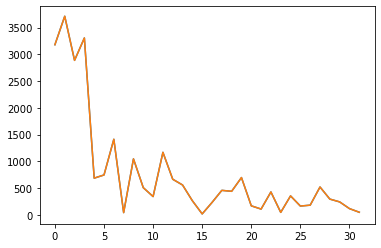

In [2]:
#FFTS
fftw3 = np.loadtxt("ffts/fftw3.txt")
gsl = np.loadtxt("ffts/gsl.txt")
fig, ax = plt.subplots()
ax.plot(fftw3) # why 3.2???????
ax.plot(gsl) 

Integer waveforms, data from: https://rno-g.uchicago.edu/data/handcarry22/rootified/station11/run700/

24
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  1.  1.  1.]
 [-2. -2. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]]


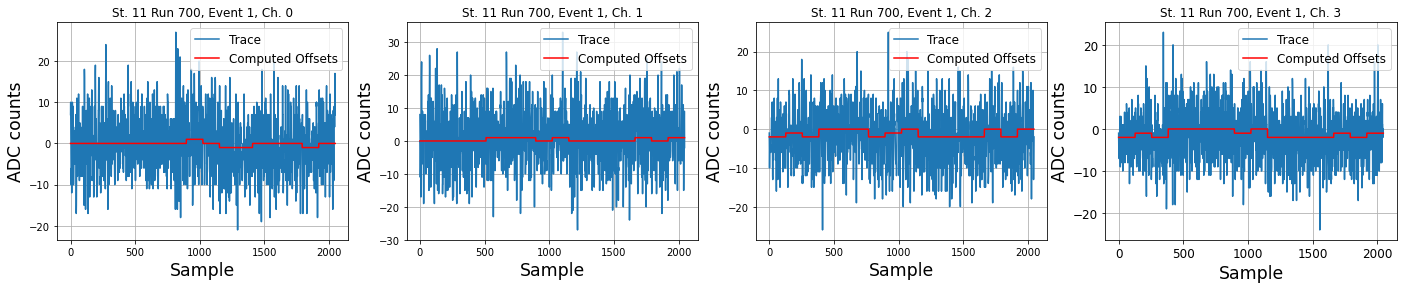

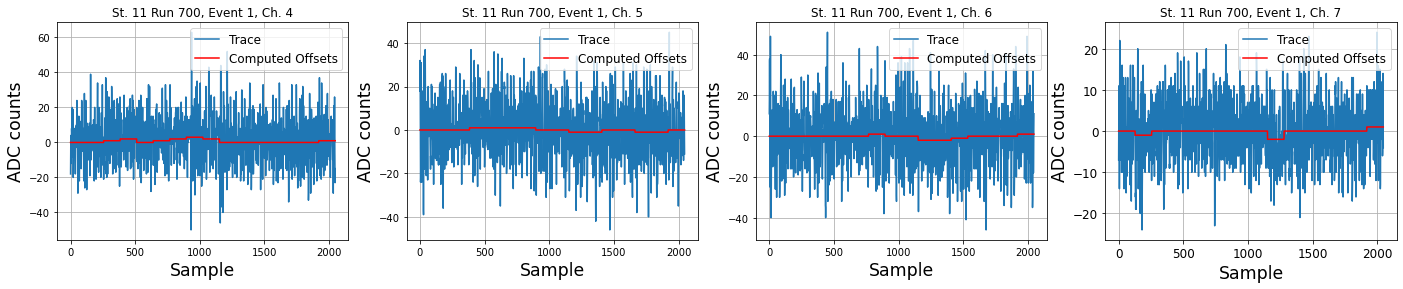

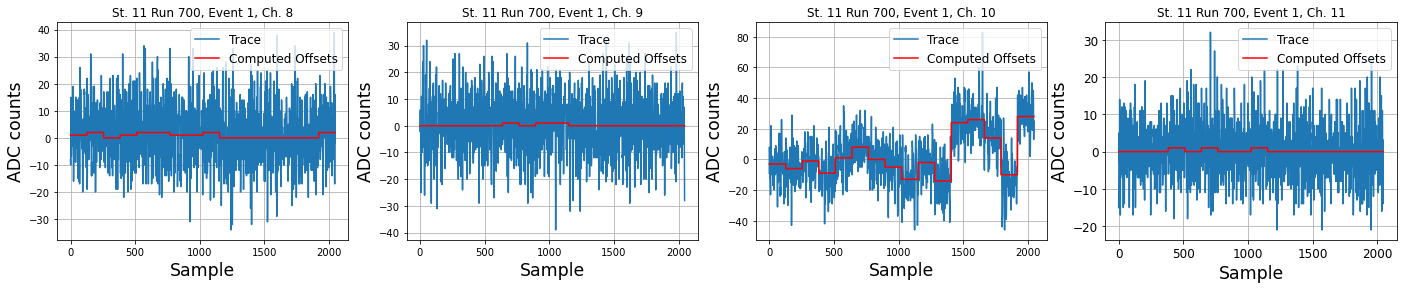

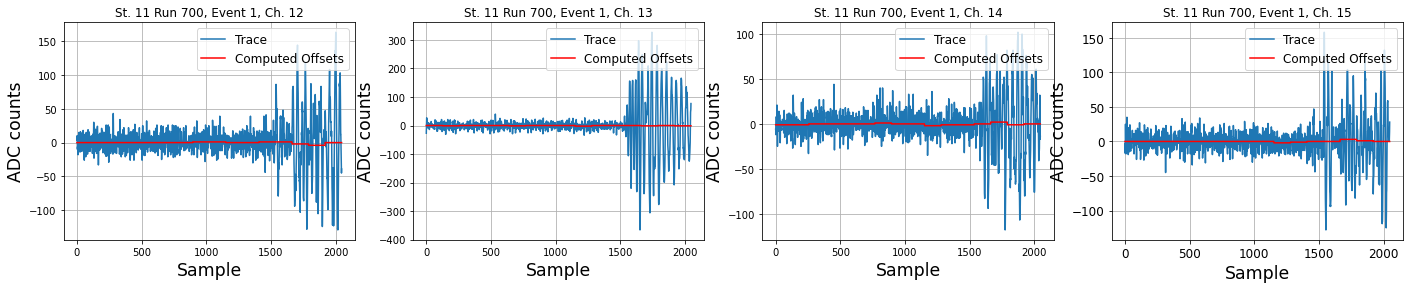

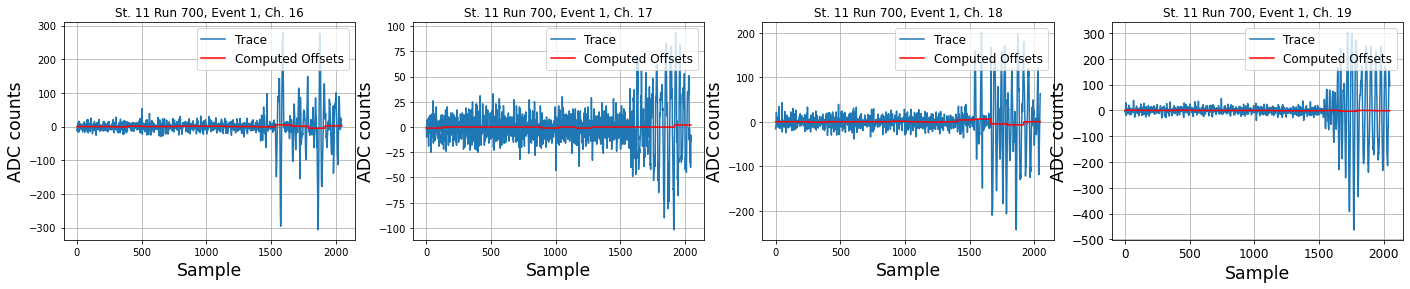

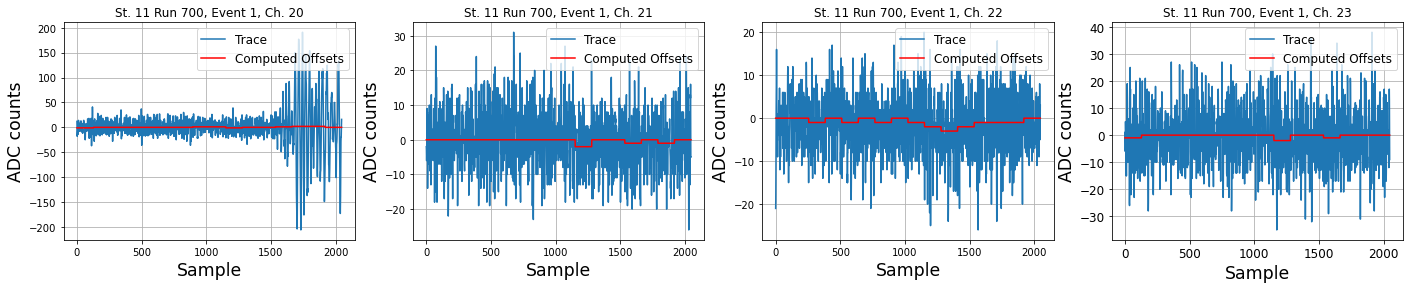

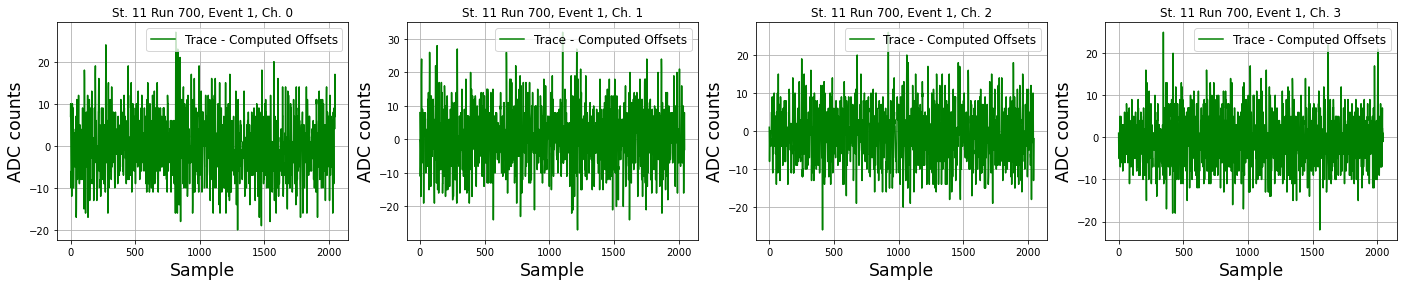

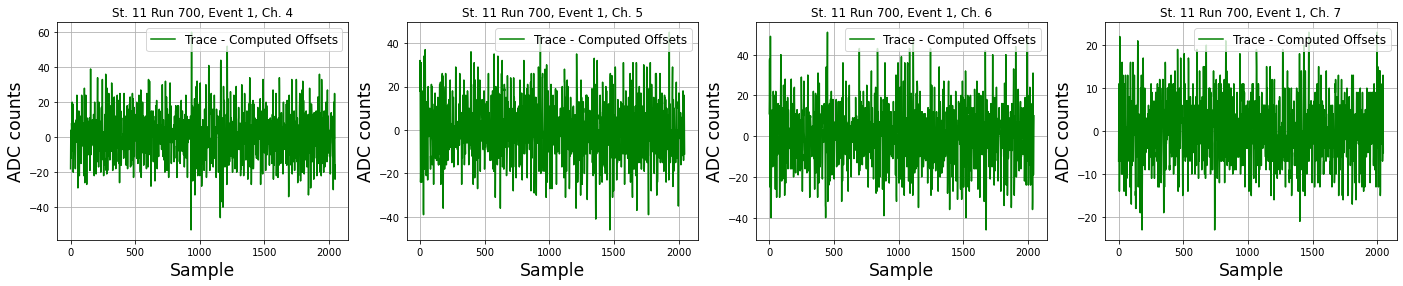

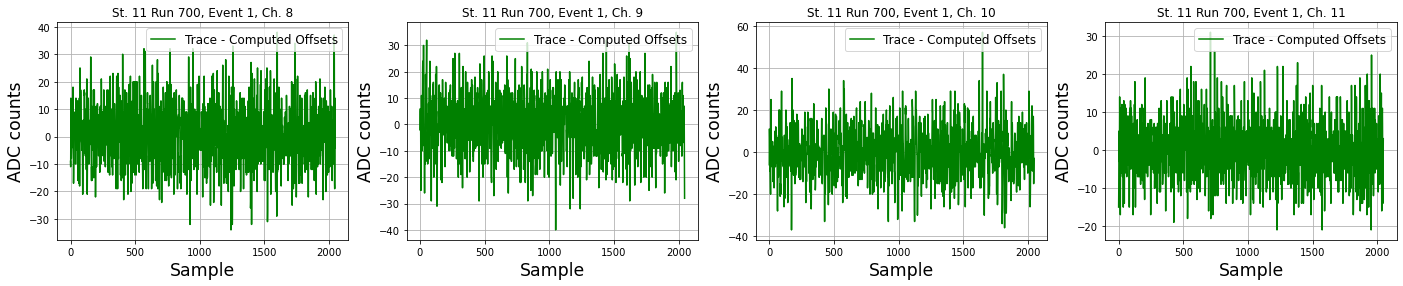

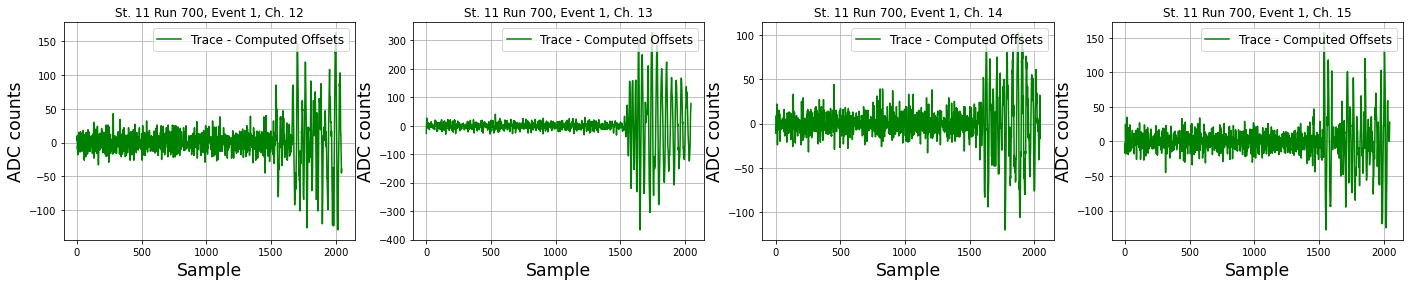

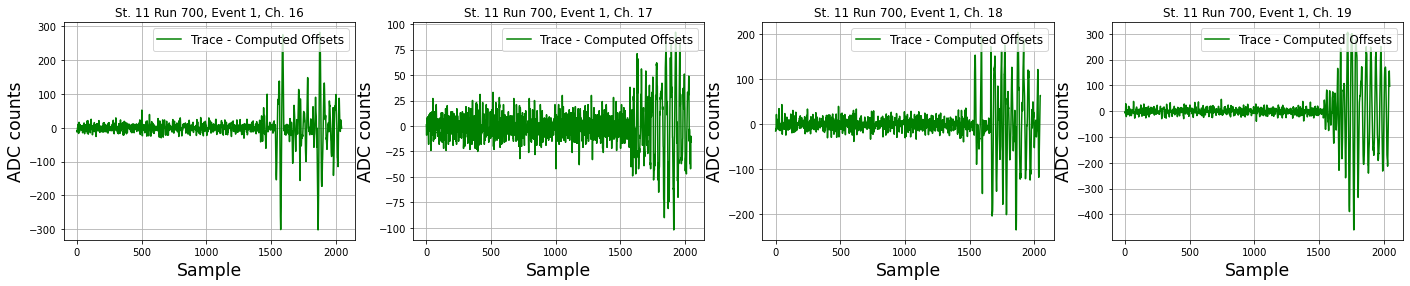

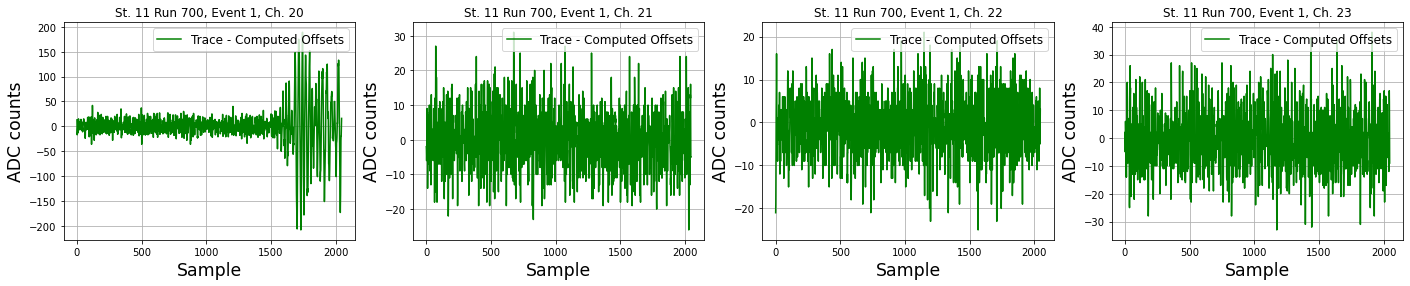

In [4]:
config = 2
host = 'laptop'
stationID = 11
run = 700
eventID = 1
nb_sample = 2048
nb_channel = 24
nb_block = 16
block_size = 128
offsets = np.loadtxt(f"ver1-0-May2023/offsets_out_int_11-700-1-gradient-ver1-0.dat")
channel = offsets[0, :]
wf = []
offsetsFull = np.zeros((nb_channel, nb_sample))
print(len(offsetsFull))
for channel_id in range(nb_channel):
    wf_file = "/home/novikov/RNO-G/data/station11/run700/raw_txt/event_1/ch_" + str(channel_id) + ".dat"
    tmp = np.loadtxt(wf_file, delimiter=" ")
    for block in range(nb_block):
        for sample_in_block in range(block_size):
            offsetsFull[channel_id][block*block_size + sample_in_block] = int(offsets[channel_id, block])

    wf.append(tmp)
    
wf = np.asarray(wf)
print(offsetsFull)
for i in range(6):
    fig, axs = plt.subplots(1,4,figsize=(24,4))
    for j in range(4):
        channel_to_plot = i*4 + j
        axs[j].set_xlabel('Sample', size = "xx-large")
        axs[j].set_ylabel('ADC counts', size = "xx-large")
        axs[j].plot(wf[channel_to_plot], label='Trace')
        axs[j].plot(offsetsFull[channel_to_plot], color = 'red', label='Computed Offsets')
        axs[j].set_title(f'St. {stationID} Run {run}, Event {eventID}, Ch. {channel_to_plot}')
        axs[j].legend(loc='upper right', prop={'size': 12})
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        axs[j].grid()
    plt.savefig(f'/home/novikov/RNO-G/block_offsets/for-slides-2023-05/offsets_{i}.png')

for i in range(6):
    fig1, axs1 = plt.subplots(1,4,figsize=(24,4))
    for j in range(4):
        channel_to_plot = i*4 + j
        axs1[j].set_xlabel('Sample', size = "xx-large")
        axs1[j].set_ylabel('ADC counts', size = "xx-large")
        axs1[j].plot(wf[channel_to_plot] - offsetsFull[channel_to_plot], color = 'green', label='Trace - Computed Offsets')
        axs1[j].set_title(f'St. {stationID} Run {run}, Event {eventID}, Ch. {channel_to_plot}')
        axs1[j].legend(loc='upper right', prop={'size': 12})
        axs1[j].grid()
    plt.savefig(f'/home/novikov/RNO-G/block_offsets/for-slides-2023-05/trace-offsets_{i}.png')

#ax.plot(wf[10] - offsetsFull[10])





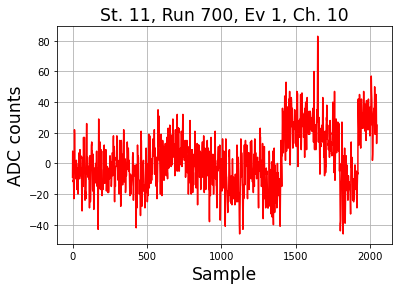

In [10]:
plt.plot(wf[10], label='Trace', color = 'red')
plt.title("St. 11, Run 700, Ev 1, Ch. 10", size = "xx-large")
plt.ylabel("ADC counts", size = "xx-large")
plt.xlabel("Sample", size = "xx-large")
plt.grid()

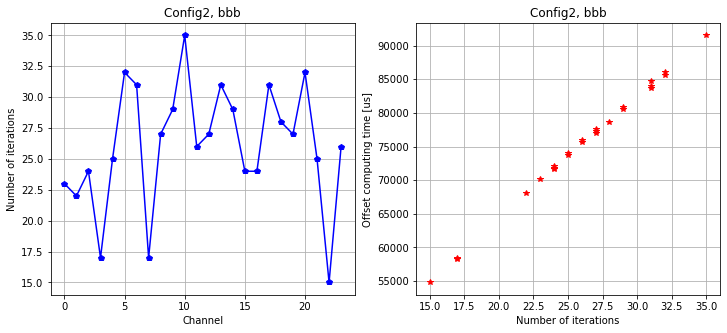

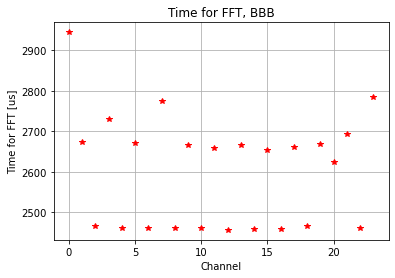

In [41]:
config =2
host = 'bbb'
time_us = np.loadtxt(f'outMicroSeconds_config{config}_{host}.dat')
channel = time_us[:, 0]
iterations = time_us[:, 1]
microseconds = time_us[:, 2]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(channel, iterations, '-p', color = 'blue')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Number of iterations')
ax[0].set_title(f'Config{config}, {host}')
ax[0].grid()

ax[1].plot(iterations, microseconds, '*', color = 'red')
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Offset computing time [us]')
ax[1].set_title(f'Config{config}, {host}')
ax[1].grid()
plt.savefig(f'/home/novikov/RNO-G/block_offsets/for_slides_2023-02/config{config}/time_config{config}_{host}.png')

figFFT, axFFT = plt.subplots()
timeFFT = np.loadtxt('outMicroSeconds_FFT_BBB.dat')
channel = timeFFT[:, 0]
microseconds = timeFFT[:, 1]
axFFT.plot(channel, microseconds, '*', color = 'red')
axFFT.set_xlabel('Channel')
axFFT.set_ylabel('Time for FFT [us]')
axFFT.set_title('Time for FFT, BBB')
axFFT.grid()
#plt.savefig(f'/home/novikov/RNO-G/block_offsets/for_slides_2023-02/FFT_BBB_time.png')



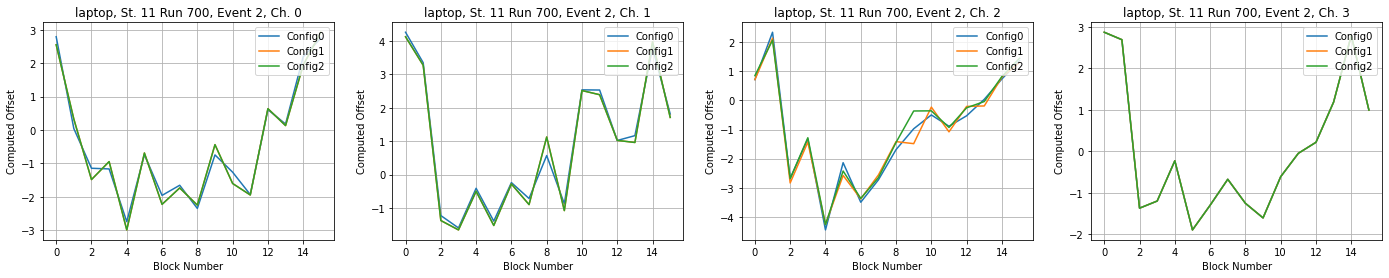

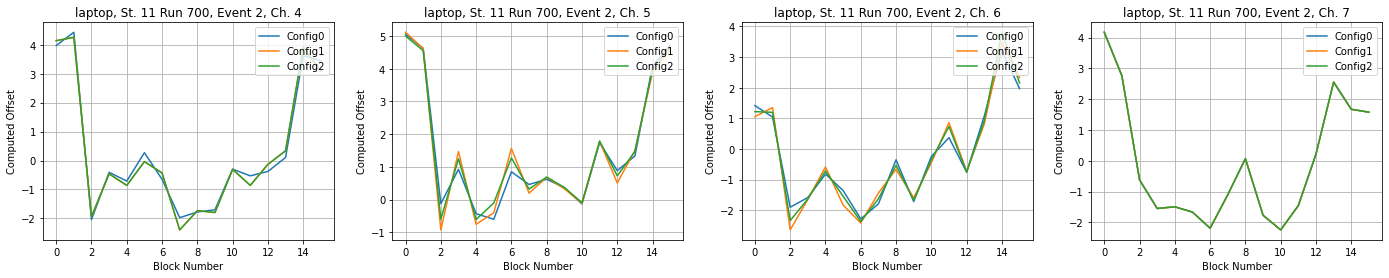

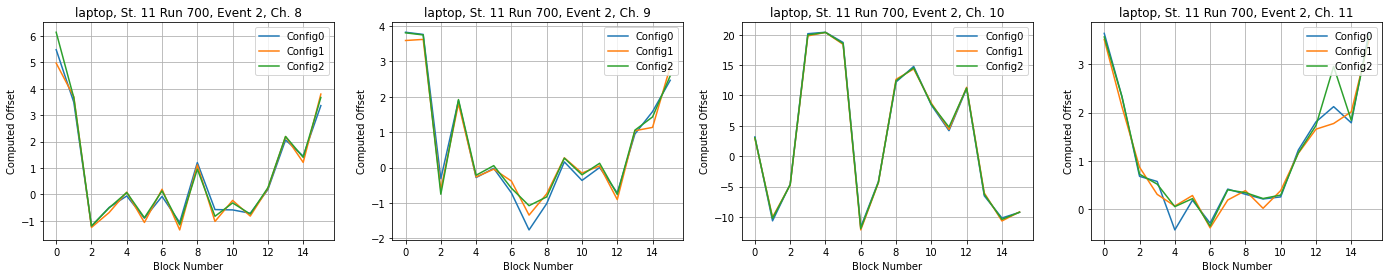

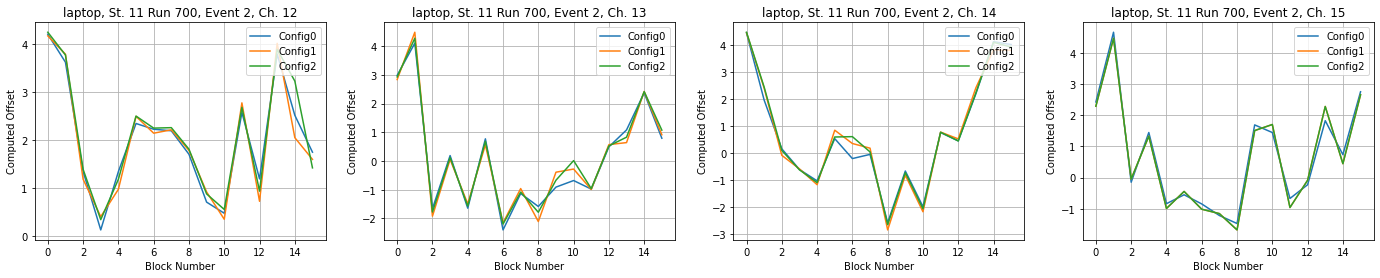

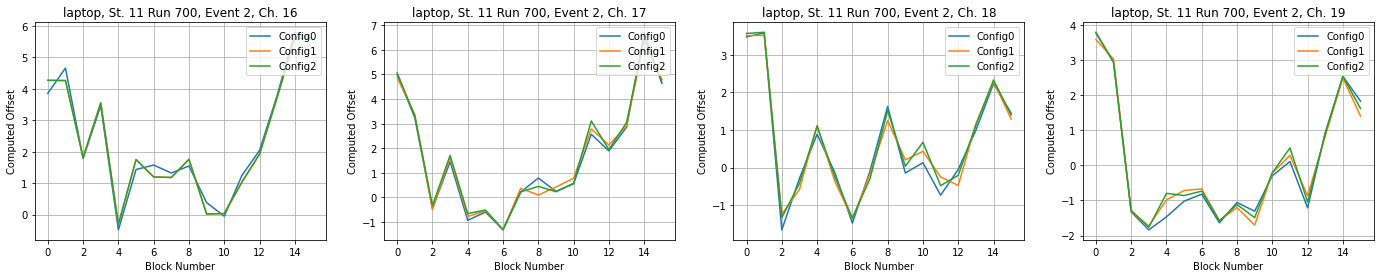

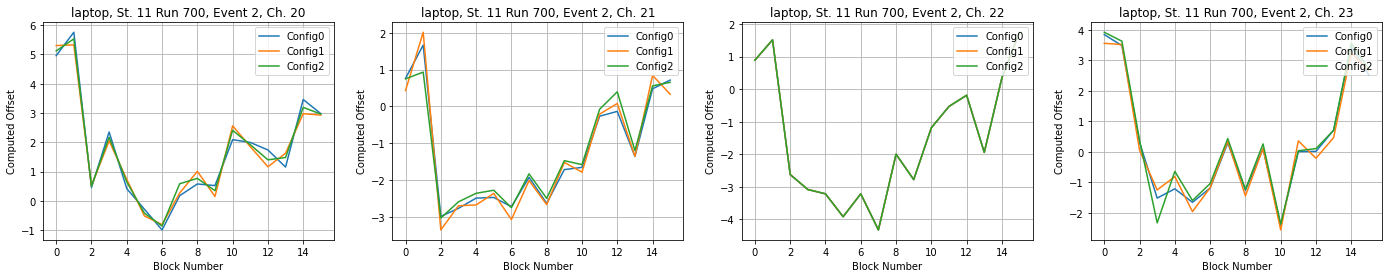

In [28]:
from matplotlib.pyplot import cm
stationID = 11
run = 700
eventID = 2
nb_sample = 2048
nb_channel = 24
nb_block = 16
block_size = 128
host = 'laptop'
nbConfig = 3
color = cm.rainbow(np.linspace(0, 1, nbConfig))


for i in range(6):
    fig, ax = plt.subplots(1,4,figsize=(24,4))
    for j in range(4):
        channel_to_plot = i*4 + j
        for config in range(nbConfig):
            offsets = np.loadtxt(f"offsets_out_int_11-700-2_config{config}_{host}.dat")
            ax[j].set_title(f'{host}, St. {stationID} Run {run}, Event {eventID}, Ch. {channel_to_plot}')
            ax[j].set_xlabel('Block Number')
            ax[j].set_ylabel('Computed Offset')
            ax[j].plot(offsets[channel_to_plot,1:], label=f'Config{config}')
            ax[j].legend(loc='upper right')
            ax[j].grid()
        plt.savefig(f'/home/novikov/RNO-G/block_offsets/for_slides_2023-02/configs_comparison/trace-offsets_{i}.png')


Gradient Tests

-39.51063
2048
[0.0015625, 0.003125, 0.0046875, 0.00625, 0.0078125, 0.009375, 0.0109375, 0.0125, 0.0140625, 0.015625, 0.0171875, 0.01875, 0.0203125, 0.021875, 0.0234375, 0.025, 0.0265625, 0.028125, 0.0296875, 0.03125, 0.0328125, 0.034375, 0.0359375, 0.0375, 0.0390625, 0.040625, 0.0421875, 0.04375, 0.0453125, 0.046875, 0.0484375, 0.05]
214556403.69874203
[[ 5.51425593e+01-1.08806293e+01j -1.87124981e+02+1.24618138e+02j
  -2.81681197e+02+4.20168999e+02j -1.54696544e+02+7.71524858e+02j
   2.06731957e+02+1.04770863e+03j  7.47708830e+02+1.12274989e+03j
   1.35387789e+03+9.07639413e+02j  1.87370323e+03+3.75691606e+02j
   2.15055981e+03-4.24344544e+02j  2.05837479e+03-1.37079952e+03j
   1.53359763e+03-2.28758677e+03j  5.96686668e+02-2.97588160e+03j
  -6.41957130e+02-3.25341100e+03j -1.99389021e+03-2.99399970e+03j
  -3.22129566e+03-2.15955585e+03j -4.07805997e+03-8.17681730e+02j]
 [ 5.09941429e+01-2.09394073e+01j -8.50076293e+01+2.03458805e+02j
   1.88454666e+02+4.58947286e+02j  7.12105816e+02

/tmp/ipykernel_2516010/727095643.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[block] = np.sum(fit[freq, :]*fit[freq, :])*2*A[block] - 2*np.sum(fit[freq, :]*FFT[freq])


[[ 2.53655773e+01-5.00508949e+00j -8.60774913e+01+5.73243436e+01j
  -1.29573351e+02+1.93277740e+02j -7.11604100e+01+3.54901435e+02j
   9.50967003e+01+4.81945968e+02j  3.43946062e+02+5.16464948e+02j
   6.22783828e+02+4.17514130e+02j  8.61903485e+02+1.72818139e+02j
   9.89257513e+02-1.95198490e+02j  9.46852405e+02-6.30567780e+02j
   7.05454910e+02-1.05228992e+03j  2.74475867e+02-1.36890553e+03j
  -2.95300280e+02-1.49656906e+03j -9.17189498e+02-1.37723986e+03j
  -1.48179600e+03-9.93395689e+02j -1.87590758e+03-3.76133596e+02j]
 [ 2.34573057e+01-9.63212737e+00j -3.91035095e+01+9.35910501e+01j
   8.66891463e+01+2.11115751e+02j  3.27568675e+02+1.36862283e+02j
   4.45688809e+02-1.83010420e+02j  2.34621057e+02-5.61546300e+02j
  -2.79331694e+02-6.80261866e+02j -7.95523926e+02-3.32379830e+02j
  -9.14834923e+02+3.75652967e+02j -4.30138604e+02+1.02950155e+03j
   4.71974241e+02+1.14940798e+03j  1.26347918e+03+5.27897378e+02j
   1.38398104e+03-5.68295515e+02j  6.25656151e+02-1.49745680e+03j
  -6.6461

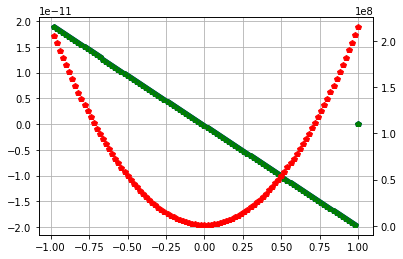

In [48]:
import matplotlib.pyplot as plt
import numpy as np
dt = 0.3125
trace_len = 2048
nb_blocks = 16
bs = 128
A = np.zeros(nb_blocks)
freq_oob = [1.5625e-03,
            3.125e-03,
            4.6875e-03,
            6.2500e-03,
            7.8125e-03,
            9.3750e-03,
            1.09375e-02,
            1.25e-02,
            1.40625e-02,
            1.5625e-02,
            1.71875e-02,
            1.875e-02,
            2.03125e-02,
            2.1875e-02,
            2.34375e-02,
            2.50000e-02,
            2.65625e-02,
            2.81250e-02,
            2.96875e-02,
            3.12500e-02,
            3.28125e-02,
            3.43750e-02,
            3.59375e-02,
            3.75000e-02,
            3.90625e-02,
            4.06250e-02,
            4.21875e-02,
            4.37500e-02,
            4.531250e-02,
            4.687500e-02,
            4.843750e-02,
            5.000000e-02]
trace = np.loadtxt("/home/novikov/RNO-G/data/station11/run700/raw_txt/ch_0.dat")
FFT =  [ 815.53014 +14.14178j,
        +406.75523  +7.66712j,
        +189.85002  +3.09700j,
        -39.51063  -2.55152j,
        +248.37110  +2.70390j,
        +23.46427  +0.16877j,
        -142.82476  -7.75851j,
        +43.80153  +2.34346j,
        +157.02420  -6.20917j,
        +27.53262  +2.13744j,
        -37.35463  +2.72317j,
        -31.84345  -2.65197j,
        -22.19224  +3.34528j,
        -51.08551  -0.86741j,
        -58.55460  -0.42175j,
        +26.13935  +1.84943j,
        +96.00086  +2.81027j,
        +73.06801  -1.41211j,
        +23.41510  -0.70137j,
        -4.98986  +0.26019j,
        +59.66213  +0.24551j,
        -42.68090  +0.87751j,
        -38.77577  -2.77307j,
        +8.11829  +2.48115j,
        +35.37602  -0.09766j,
        +3.51757  +0.65617j,
        -17.63742  -0.89497j,
        -23.86645  -1.77390j,
        +20.22697  -2.23723j,
        +2.79704  +2.48818j,
        +3.81397  +1.27088j,
        +7.64791  +0.69533j ]
print(FFT[3].real)
print(len(trace))
nb_freq = len(freq_oob)
fit = np.zeros((nb_freq, nb_blocks), dtype = complex)
fit_sum = np.zeros(nb_freq, dtype = complex)
grad = np.zeros(nb_blocks)
fig, ax = plt.subplots()
ax2=ax.twinx()
rangeA = 100
for step in range(int(rangeA)):
        for i in range(len(A)):
                A[i] = (step - int(rangeA/2))/10.0*(i-0.2)
                # A[i] = 
        print(freq_oob)
        for block in range (len(A)):
                for freq in range(len(freq_oob)):
                        fit[freq, block] = np.exp(-2.j*np.pi*freq_oob[freq]*dt*((block+0.5)*bs -0.5))*np.sqrt(2)*dt*np.sin(np.pi*freq_oob[freq]*bs*dt)/np.sin(np.pi*freq_oob[freq]*dt)*A[block]
                        #print("sin etc: ", np.sqrt(2)*dt*np.sin(np.pi*freq_oob[freq]*bs*dt)/np.sin(np.pi*freq_oob[freq]*dt))
        #print("#######################")
       
        #print("len of freq_oob: ", len(freq_oob))
        for freq in range(len(freq_oob)):
                fit_sum[freq] =np.sum(fit[freq, :])
        
                
        chi2 = np.abs(np.sum((fit_sum - FFT)**2))
        print(chi2)
        # ax.plot(A[0], grad[0], '-p', color = 'blue' )
      
        ax2.plot(A[0], chi2, '-p', color = 'red' )
        ax.plot(A[0], grad[5], '-p', color = 'blue' )
        ax.plot(A[0], grad[0], '-p', color = 'green' )
        ax.grid(True)
        #print(fit_sum)
        for block in range (len(A)):
                grad[block] = np.sum(fit[freq, :]*fit[freq, :])*2*A[block] - 2*np.sum(fit[freq, :]*FFT[freq])
                # print( np.sum(fit[freq, :]**2)*2*A[block])
        #print(grad)
        print(fit)

Raw data with multiple channels

[-27.  -3.  22. ...  52.  56.  77.]


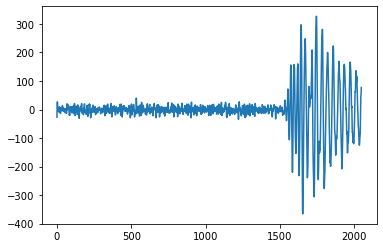

In [3]:
#quick test of raw data
wf = []
import matplotlib.pyplot as plt
wf_file = "/home/novikov/RNO-G/data/station11/run700/raw_txt/event_1/ch_13.dat"
tmp = np.loadtxt(wf_file, delimiter=" ")
wf.append(tmp) 
print(tmp)   
wf = np.asarray(wf)
#print(wf)
plt.plot(tmp)
plt.show()

config 10:
T = gsl_multimin_fdfminimizer_conjugate_fr;
gsl_multimin_fdfminimizer_set (s, &chi2_to_min, x, 0.5, 0.1); 

In [4]:
config = 10
host = 'laptop'
stationID = 11
run = 700
eventID = 1
nb_sample = 2048
nb_channel = 24
nb_block = 16
block_size = 128
offsets = np.loadtxt("/home/novikov/RNO-G/block_offsets/comparison/bbb-v1-0/offsets_out_int_11-700-1-gradient-bbb.dat")
#offsets = np.loadtxt("offsets_out_int_11-700-1-gradient-no-guess.dat")
offsetsSimplex = np.loadtxt("offsets_out_int_11-700-1-simplex.dat")
offsetsGuess = np.loadtxt("offsets_out_int_11-700-1-gradient-guess-2023-04-17.dat")
channel = offsets[0, :]
wf = []
offsetsFull = np.zeros((nb_channel, nb_sample))
offsetsFullGuess = np.zeros((nb_channel, nb_sample))
offsetsFullSimplex = np.zeros((nb_channel, nb_sample))
print(len(offsetsFull))

for channel_id in range(nb_channel):
    wf_file = "/home/novikov/RNO-G/data/station11/run700/raw_txt/event_1/ch_" + str(channel_id) + ".dat"
    tmp = np.loadtxt(wf_file, delimiter=" ")
    for block in range(nb_block):
        for sample_in_block in range(block_size):
            offsetsFull[channel_id][block*block_size + sample_in_block] = int(offsets[channel_id, block])
            offsetsFullGuess[channel_id][block*block_size + sample_in_block] = int(offsetsGuess[channel_id, block])
            #offsetsFullSimplex[channel_id][block*block_size + sample_in_block] = int(offsetsSimplex[channel_id, block])
    wf.append(tmp)
    
wf = np.asarray(wf)
print(offsetsFull)
for i in range(6):
    fig, axs = plt.subplots(1,4,figsize=(24,4))
    for j in range(4):
        channel_to_plot = i*4 + j
        axs[j].set_xlabel('Sample')
        axs[j].set_ylabel('ADC counts')
        #axs[j].plot(wf[channel_to_plot], label='Trace')
        #axs[j].plot(offsetsFullSimplex[channel_to_plot], color = 'blue', label='int(Computed Offsets)')
        axs[j].plot(offsetsFull[channel_to_plot], color = 'red', label='int(Computed Offsets)')
        axs[j].plot(offsetsFullGuess[channel_to_plot], color = 'green', label='int(Guess Offsets (Average))')
        axs[j].set_title(f'Config{config}, {host}, St. {stationID} Run {run}, Event {eventID}, Ch. {channel_to_plot}')
        axs[j].legend(loc='upper right')
    #plt.savefig(f'/home/novikov/RNO-G/block_offsets/for_slides_2023-02/config{config}/gsl_multimin_fminimizer_nmsimplex/offsets_{i}.png')

for i in range(6):
    fig1, axs1 = plt.subplots(1,4,figsize=(24,4))
    for j in range(4):
        channel_to_plot = i*4 + j
        axs1[j].set_xlabel('Sample')
        axs1[j].set_ylabel('ADC counts')
        axs1[j].plot(wf[channel_to_plot], color ='blue', label='Trace')
        axs1[j].plot(wf[channel_to_plot] - offsetsFull[channel_to_plot], color = 'green', label='Trace - int(Computed Offsets)')
        axs1[j].set_title(f'Config{config}, {host}, St. {stationID} Run {run}, Event {eventID}, Ch. {channel_to_plot}')
        axs1[j].legend(loc='upper right')
    #plt.savefig(f'/home/novikov/RNO-G/block_offsets/for_slides_2023-02/config{config}/gsl_multimin_fminimizer_nmsimplex/trace-offsets_{i}.png')


OSError: /home/novikov/RNO-G/block_offsets/comparison/bbb-v1-0/offsets_out_int_11-700-1-gradient-bbb.dat not found.

[-27.  -3.  22.  27.  24.   4.  -4.  -4.  -2.   5.   6.   3.  -2.  -9.
  -7.   0.   9.  10.   7.  -4.  -4.  -2.  -7.  -9. -14.  -4.   0.   6.
   2.  -2.  -2.  -2.  -3.  -4.  -5.   6.  12.  14.  13.   8.   4.  -4.
  -3.  -3.   6.   6.   2.  -6.  -7.  -1.   0.   1.  -2.  -1.  -6.  -9.
 -11.  -3.   0.   3.   2.  -4.  -7. -13. -12. -13.   0.  17.  20.  10.
   2.  -1.   4.   9.  16.  13.  15.  12.  12.  10.   6.  -3. -14. -17.
 -20. -17. -20. -18. -11.  -2.   9.  11.  10.   3.  10.   5.  -3.  -5.
  -4.  -2.  -3. -12. -12.  -4.  -1.   7.  10.  11.   8.   7.  11.   8.
  12.  -2. -12. -15.  -6.  14.  21.  14.   2. -10. -21. -19.  -9.   6.
  11.   4.  -7.  -8.]
4.40548


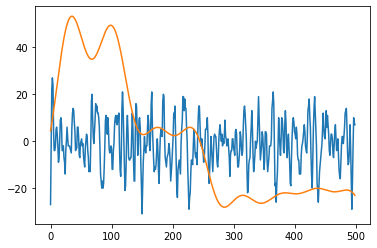

In [5]:
#lpf test
wf = []
import matplotlib.pyplot as plt
wf_file = "/home/novikov/RNO-G/data/station11/run700/raw_txt/event_1/ch_13.dat"
lpf_file = "../lpf_ch13.dat"
lpf = np.loadtxt(lpf_file, delimiter=" ")
tmp = np.loadtxt(wf_file, delimiter=" ")
ch13_orig_file = "/home/novikov/RNO-G/data/station11/run700/ch_13_backup.dat"
ch13_original= np.loadtxt(ch13_orig_file, delimiter=" ")
print(tmp[:130])   
print(lpf[0]*10)
wf = np.asarray(wf)
#print(wf)

#plt.show()
#plt.xlim(0, 130)
#plt.ylim(-20, 50)
plt.plot(tmp[:500])
#plt.plot(ch13_original[:50])
plt.plot(lpf[:500]*10)
plt.show()

2048
36
1
-28
-25
-46
31
-38
24
-3
-28
7
28
18
5
-46
0


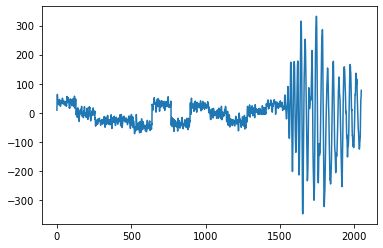

In [97]:
#artifical offsets in ch13 (event 1, run 700, st 11)
import matplotlib.pyplot as plt
from random import random
block_size=128
trace_len = 2048
nb_blocks = 16
wf_file = "artificial_offset_ch13/ch_13.dat"
wf = np.loadtxt(wf_file, delimiter=" ")

print(len(wf))
for block in range(nb_blocks):
    offset = int((random()-(0.5))*100)
    print(offset)
    for sample in range(block_size):
        wf[block*block_size + sample ] = wf[block*block_size + sample] + offset
plt.plot(wf)
np.savetxt("tmp.dat", wf, fmt='%i')


2023-4-18

artificail offsets:

36
1
-28
-25
-46
31
-38
24
-3
-28
7
28
18
5
-46
0

calculated:
38.8434 3.67505 -23.5805 -21.3497 -39.7069 31.0659 -30.1185 26.9653 2.32566 -24.8508 10.3296 31.3615 22.7562 6.86517 -39.3714 3.00533 

[8.8434, 3.67505, -23.5805, -21.3497, -39.7069, 31.0659, -30.1185, 26.9653, 2.32566, -24.8508, 10.3296, 31.3615, 22.7562, 6.86517, -39.3714, 3.00533]


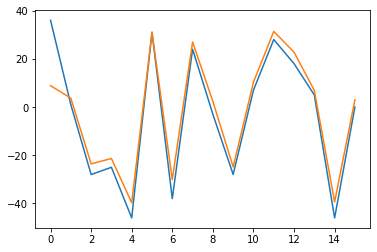

In [109]:
offsets_art = [36,
1,
-28,
-25,
-46,
31,
-38,
24,
-3,
-28,
7,
28,
18,
5,
-46,
0]

offsets_comp = [8.8434, 3.67505, -23.5805, -21.3497, -39.7069, 31.0659, -30.1185, 26.9653, 2.32566, -24.8508, 10.3296, 31.3615, 22.7562, 6.86517, -39.3714, 3.00533]
wf_file = "artificial_offset_ch13/ch_13_with_art_offsets.dat"
wf = np.loadtxt(wf_file, delimiter=" ")
print(offsets_comp)
plt.plot(offsets_art)
plt.plot(offsets_comp)


In [85]:
#artifical offsets in ch20 (event 1, run 700, st 11) --statistics
import matplotlib.pyplot as plt
from random import random
block_size=128
trace_len = 2048
nb_blocks = 16
nb_files = 10000
offsets_ar = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
wf_file = "ch20_art_offsets/ch_20-original.dat"
wf = np.loadtxt(wf_file, delimiter=" ")
print(len(wf))
for file in range(nb_files):
    wf = np.loadtxt(wf_file, delimiter=" ")
    #offsets_ar = np.asarray(offsets_ar)
    for block in range(nb_blocks):
        offset = int((random()-(0.5))*100)
        offsets_ar[block] = offset
        #print(offset)
        for sample in range(block_size):
            wf[block*block_size + sample ] = wf[block*block_size + sample] + offset
#plt.plot(wf)
    np.savetxt(f"ch20_art_offsets/ch_with_offsets/{file}.dat", wf, fmt='%i')
    np.savetxt(f"ch20_art_offsets/offsets/{file}.dat", offsets_ar, fmt='%i')
    print(offsets_ar)
    print(len(offsets_ar))


IndentationError: unexpected indent (3896523405.py, line 22)

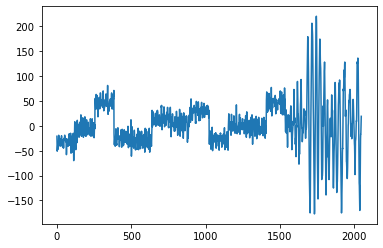

In [9]:
wf_lpf_file = "ch20_art_offsets/ch_with_offsets/lpf0_tmp.dat"
wf_lpf = np.loadtxt(wf_lpf_file, delimiter=" ")
wf_file = "ch20_art_offsets/ch_with_offsets/1.dat"
wf = np.loadtxt(wf_file, delimiter=" ")
#plt.plot(wf_lpf[:500])
plt.plot(wf)

0.8695168750000001


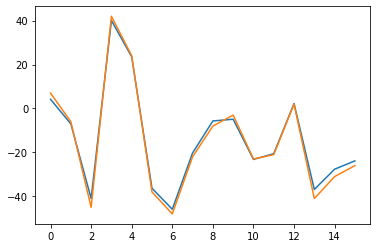

In [20]:
of_ch0 = [4.18638, -7.00173, -41.0071, 40.0819, 23.5137, -36.3291, -45.8866, -20.2531, -5.66502, -4.89691, -23.1909, -20.5777, 2.28775, -36.8687, -27.6371, -23.8435]
of_ar_file = "ch20_art_offsets/offsets/0.dat" 
of_ar = np.loadtxt(of_ar_file, delimiter=" ")
#plt.plot(of_ch0-of_ar)
print(np.mean(of_ch0-of_ar))
plt.plot(of_ch0)
plt.plot(of_ar)


160000
0.625
[-1  0  1  1  2 -1  1  0  1 -2 -1 -1 -1  3  2  2]
0.44440625 2.2013000329262113


Text(0.5, 1.0, 'St11, Run700, Ev1, Ch20, Fake Offsets, 10k events')

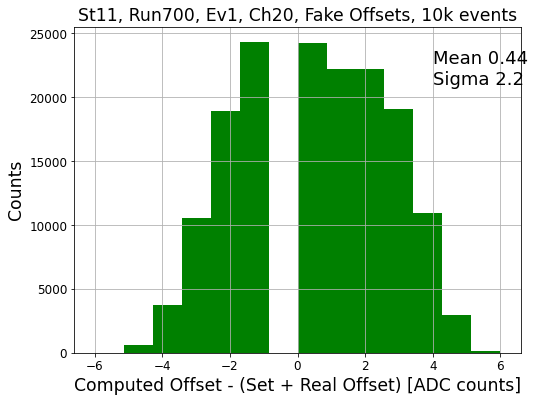

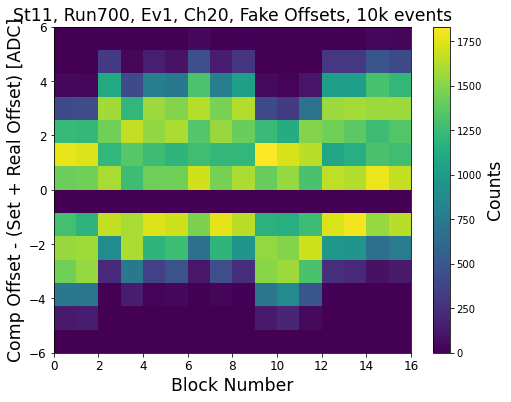

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from matplotlib.colors import LogNorm
from scipy.stats import norm

#---- artificial offsets statistics
nb_files = 10000
nb_blocks = 16
computed_offsets = np.loadtxt("ch20_art_offsets/ch20_art_computed.dat", delimiter=" ")
diff_array2d = np.empty((nb_files, nb_blocks), int)
diff_array1d =[]
x_for2D = np.linspace(0, 16, 16)
art_offset_all=[]
real_offsets = [-1, 0, 0, 0, 0, 0, 0, 1, 1, -1, 0, 0, 1, 2, 2, 0] 
#real_offsets = [1, 0, 0, 1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -3, 0, -1]
for file in range(nb_files):
    art_offset =  np.loadtxt(f"ch20_art_offsets/offsets/{file}.dat", delimiter=" ")
    #diff_array2d= np.vstack((diff_array2d, computed_offsets - art_offset))
    for block in range(nb_blocks):
        diff = computed_offsets[file, block] - art_offset[block] - real_offsets[block]
        diff_array1d.append(diff)
        diff_array2d[file][block]= diff
        art_offset_all.append(art_offset[block])
x_for2D = np.matlib.repmat(x_for2D, nb_files, 1).flatten()
diff_array2d_flat = diff_array2d.flatten()
print(len(x_for2D))  
print(np.mean(diff_array2d[2]))
print(diff_array2d[0])   

fig1 = plt.figure(figsize=(8,6))
#ax = plt.subplot()     
plt.hist(diff_array1d, bins = 14, color = 'green')
plt.grid()
plt.xlabel('Computed Offset - (Set + Real Offset) [ADC counts]', fontsize='xx-large')
plt.ylabel('Counts', fontsize='xx-large')
(mu, sigma) = norm.fit(diff_array1d)
print(mu, sigma)
plt.text(4, 21000, f'Mean {mu:.2}\nSigma {sigma:.2}', fontsize=18, alpha=1.0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("St11, Run700, Ev1, Ch20, Fake Offsets, 10k events", fontsize='xx-large')

fig2 = plt.figure(figsize=(8,6))
#plt.hist2d(x_for2D, diff_array2d_flat, bins = (16, 14))
plt.plot(computed_offsets, diff_array1d )
plt.xlabel('Block Number', fontsize='xx-large')
plt.ylabel('Comp Offset - (Set + Real Offset) [ADC]', fontsize='xx-large')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("St11, Run700, Ev1, Ch20, Fake Offsets, 10k events", fontsize='xx-large')




0.75690625 2.52198318366934


Text(0.5, 1.0, 'St11, Run700, Ev1, Ch20, Fake Offsets, 10k events')

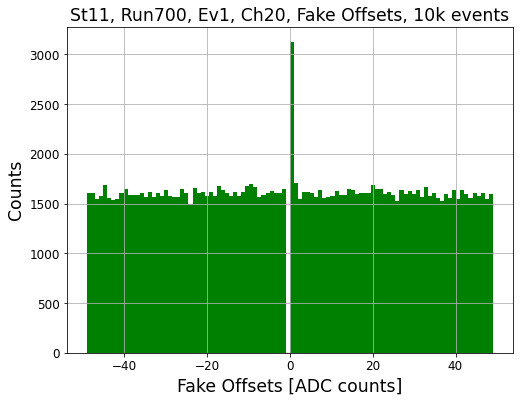

In [82]:
fig1 = plt.figure(figsize=(8,6))
#ax = plt.subplot()     
plt.hist(art_offset_all, bins = 100, color = 'green')
plt.grid()
plt.xlabel('Fake Offsets [ADC counts]', fontsize='xx-large')
plt.ylabel('Counts', fontsize='xx-large')
(mu, sigma) = norm.fit(diff_array1d)
print(mu, sigma)
# plt.text(4, 21000, f'Mean {mu:.2}\nSigma {sigma:.2}', fontsize=18, alpha=1.0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("St11, Run700, Ev1, Ch20, Fake Offsets, 10k events", fontsize='xx-large')

Text(0.5, 1.0, 'St11, Run700, Ev1, Ch20, Real Signal')

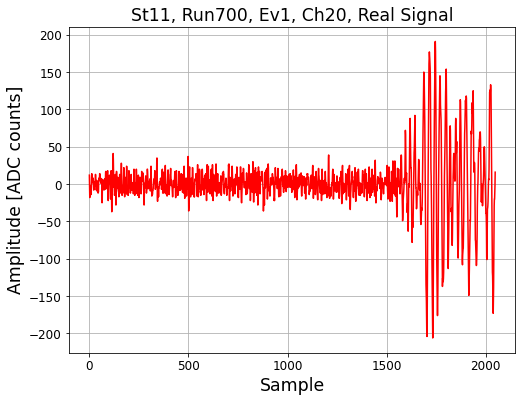

In [90]:
#Ch 20 - original signal
#wf_file = "ch20_art_offsets/ch_20-original.dat"
wf_file = "/home/novikov/RNO-G/data/station11/run700/raw_txt/event_1/ch_20.dat"
wf = np.loadtxt(wf_file, delimiter=" ")
fig1 = plt.figure(figsize=(8,6))    
plt.plot(wf, color = 'red')
plt.grid()
plt.xlabel('Sample', fontsize='xx-large')
plt.ylabel('Amplitude [ADC counts]', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("St11, Run700, Ev1, Ch20, Real Signal", fontsize='xx-large')